# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_ms = pd.merge(mouse_metadata, study_results,  how = "left", on=["Mouse ID","Mouse ID"])

# Display the data table for preview
combined_ms.drop_duplicates(subset="Mouse ID", keep=False, ignore_index=True).head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b447,Ceftamin,Male,2,30,0,45.0,0
1,d133,Zoniferol,Male,5,30,0,45.0,0
2,f932,Ketapril,Male,15,29,0,45.0,0
3,h428,Ketapril,Female,1,27,0,45.0,0
4,l872,Placebo,Male,19,30,0,45.0,0


In [2]:
# Checking the number of mice.
combined_ms["Mouse ID"].nunique(0)

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = combined_ms.duplicated(subset=['Mouse ID', 'Timepoint'], keep="first")
duplicated_mice_ID = combined_ms.loc[duplicated_mice == True, 'Mouse ID'].unique()

# Display duplicate array
duplicated_mice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice_ID_data = combined_ms.loc[combined_ms['Mouse ID'] == duplicated_mice_ID[0],]

# Display table
duplicated_mice_ID_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = combined_ms.drop(duplicated_mice_ID_data.index)

# Display first five records of DataFrame
clean_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice["Mouse ID"].nunique(0)

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean = clean_mice.groupby('Drug Regimen').mean(numeric_only = True)['Tumor Volume (mm3)']
tumor_median = clean_mice.groupby('Drug Regimen').median(numeric_only = True)['Tumor Volume (mm3)']
tumor_variance = clean_mice.groupby('Drug Regimen').var(numeric_only = True)['Tumor Volume (mm3)']
tumor_std = clean_mice.groupby('Drug Regimen').std(numeric_only = True)['Tumor Volume (mm3)']
tumor_sem = clean_mice.groupby('Drug Regimen').sem(numeric_only = True)['Tumor Volume (mm3)']


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_df = pd.DataFrame({
"Mean Tumor Volume": tumor_mean,
"Median Tumor Volume": tumor_median,
"Tumor Volume Variance": tumor_variance,
"Tumor Volume Std. Dev.": tumor_std,
"Tumor Volume Std. Err.": tumor_sem
})

# Display DataFrame
drug_regimen_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_agg = clean_mice.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])

# Display table
drug_regimen_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

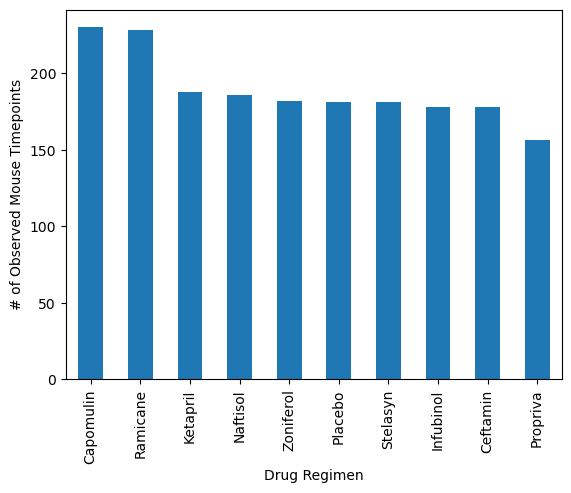

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Duplicate clean dataframe to avoid confusion with dataframe from previous step
clean_mice2 = combined_ms.drop_duplicates(subset=["Mouse ID", "Timepoint"])

# Get data for plot using Pandas
regimen_counts = clean_mice2["Drug Regimen"].value_counts()

# Add labels for axes
regimen_counts_pandas = regimen_counts.plot.bar(xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints")

# Display plot
plt.show()

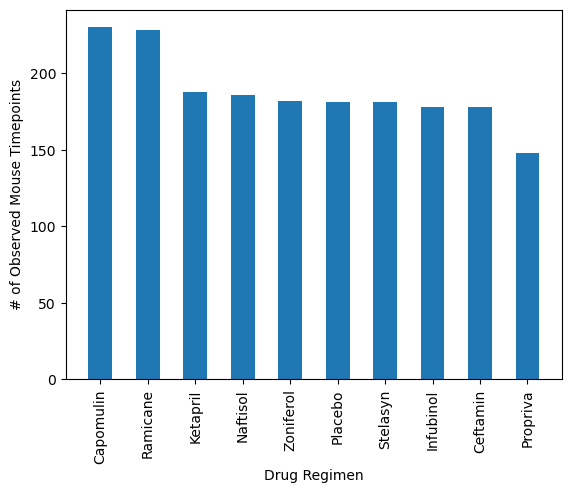

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Create bar plot data
drug_counts = clean_mice['Drug Regimen'].value_counts()
x_axis = list(range(len(drug_counts)))

# Create bar ticks
plt.bar(x_axis, drug_counts, width = 0.5)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_counts.index.values)
plt.xticks(rotation=90)

# Add labels for axes
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Display plot
plt.show()

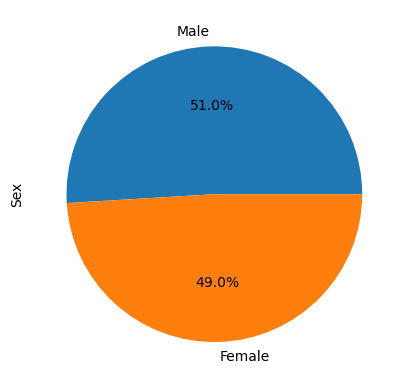

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender = clean_mice['Sex'].value_counts()
mouse_pie = pd.Series(mouse_gender.values, index=mouse_gender.index)
mouse_pie.plot(kind='pie', autopct='%1.1f%%', startangle=0, ylabel="Sex")

# Display plot
plt.show()

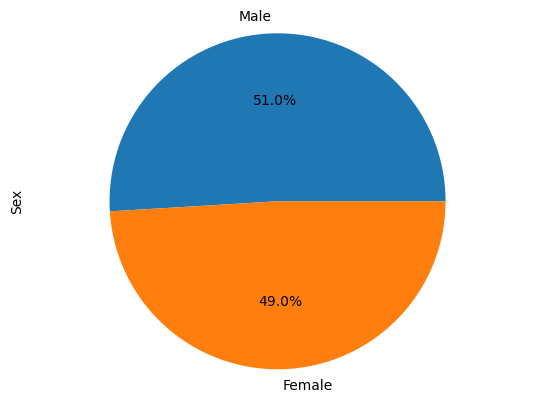

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_gender, autopct="%1.1f%%", startangle=0, labels=mouse_gender.index)
plt.axis("equal")
plt.ylabel("Sex")

# Save pie plot as an image
plt.savefig("images/Glantz_PyPies_pyplot.png")

# Display plot
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across the four most promising treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint= clean_mice.groupby('Mouse ID').max()['Timepoint']
max_timepoint_df = pd.DataFrame(max_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol_df = pd.merge(max_timepoint_df, clean_mice, on=("Mouse ID","Timepoint"))

# Display DataFrame
final_tumor_vol_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put the subset of treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    drug_regimen_loop = final_tumor_vol_df.loc[final_tumor_vol_df['Drug Regimen'] == drug]
    
    quartiles = drug_regimen_loop['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = drug_regimen_loop['Tumor Volume (mm3)']
    potential_outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
       
    # Add the subset to the empty list 
    tumor_volume_data.append({
        'Drug': drug,
        'Lower Quartile': lowerq,
        'Upper Quartile': upperq,
        'IQR': iqr,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Potential Outliers': potential_outliers
    })
    
    # Determine and print outliers using upper and lower bounds
    print(drug + "'s potential outliers:", potential_outliers)

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


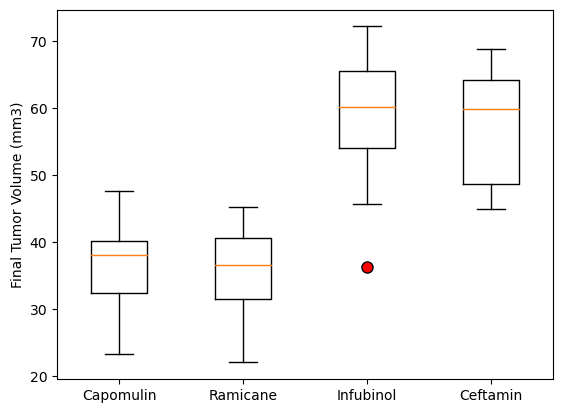

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data2 = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    drug_regimen_loop = final_tumor_vol_df.loc[final_tumor_vol_df['Drug Regimen'] == drug]
    
    # Extract tumor volume data for this drug
    tumor_volume = drug_regimen_loop['Tumor Volume (mm3)']
       
    # Append tumor volume data for this drug to tumor_volume_data list
    tumor_volume_data2.append(tumor_volume)

# Create visual elements of boxplot
tumor_volume_boxplot = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

# Plot boxplot
plt.boxplot(tumor_volume_data2, flierprops=tumor_volume_boxplot)

# Add labels to boxplot
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], drugs)

# Display plot
plt.show()

## Line and Scatter Plots

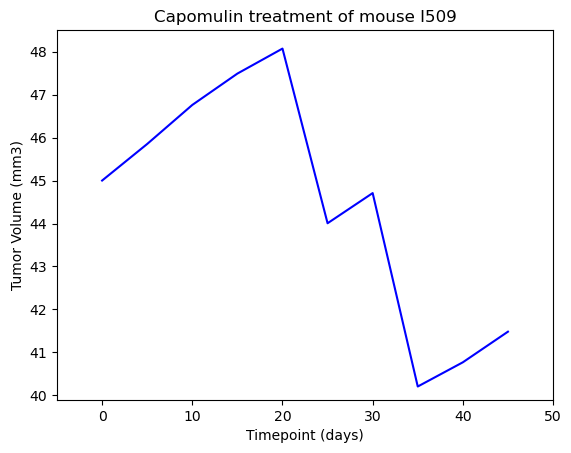

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capo_treatment = clean_mice.loc[clean_mice["Mouse ID"] == "l509"]
single_mouse = capo_treatment.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]

# Store values for x and y axis
capo_timepointx = single_mouse['Timepoint']
capo_tumor_volume = single_mouse['Tumor Volume (mm3)']

# Plot data
plt.plot(capo_timepointx, capo_tumor_volume, color="blue", label="")
plt.title("Capomulin treatment of mouse I509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

# Set limits to axes so that plot is clearly and completely seen
plt.xlim(-5, 50)
plt.ylim(39.9, 48.5)

# Display plot
plt.show()

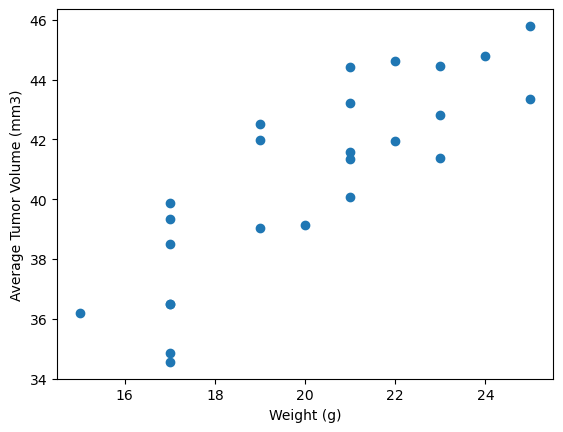

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Isolate cases that only use the Capomulin regimen
capomulin_df = clean_mice.loc[clean_mice['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Merge average tumor volume onto data_df and drop duplicates
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Display plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


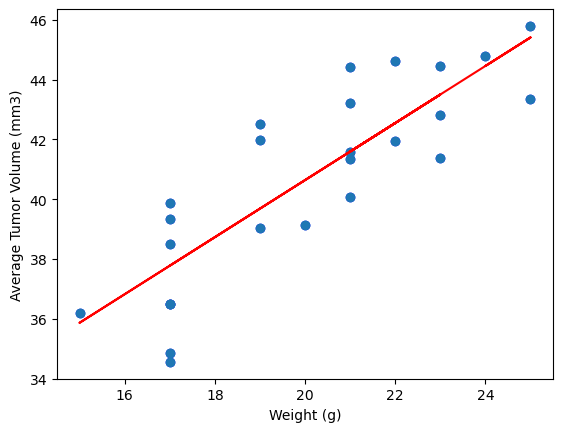

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Duplicate code for scatter plot from above:
capomulin_df = clean_mice.loc[clean_mice['Drug Regimen'] == 'Capomulin']
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df
x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x,y, color='b')

# Add labels to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above correlation calculation
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# Calculate linear regression (using linregress from scipy.stats)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Add labels to plot axes
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Display plot
plt.show()